In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2xhdXJlbnQvTmV4dGNsb3VkL0xBVVJFTlQvTElWUkVTL3NpdGVfcmVncmVzc2lvbl9weXRob24vY29kZXM='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

/var/folders/rw/lcb4hvdj44z2zh_2scz_3xgh0000gq/T/ipykernel_31303/1555994662.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/opt/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1728049825.3314297, "/opt/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1728049825.3348482, "/opt/miniconda3/lib/python3.12/zipimport.py": 1728049824.153947, "/opt/miniconda3/lib/python3.12/codecs.py": 1728049823.7001593, "/opt/miniconda3/lib/python3.12/encodings/aliases.py": 1728049824.5312598, "/opt/miniconda3/lib/python3.12/encodings/__init__.py": 1728049824.5277886, "/opt/miniconda3/lib/python3.12/encodings/utf_8.py": 1728049824.9295616, "/opt/miniconda3/lib/python3.12/abc.py": 1728049823.647853, "/opt/miniconda3/lib/python3.12/io.py": 1728049823.8195863, "/opt/miniconda3/lib/python3.12/stat.py": 1728049824.0119774, "/opt/miniconda3/lib/python3.12/_collections_abc.py": 1728049823.6009316, "/opt/miniconda3/lib/python3.12/genericpath.py": 1728049823.7784452, "/opt/miniconda3/lib/python3.12/posixpath.py": 1728049823.912881, "/opt/miniconda3/lib/python3.12/os.py": 1728049823.8794641, "/opt/miniconda3/lib/python3.

In [2]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, \
    LogisticRegressionCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as sklm
from patsy import dmatrix

import sys
sys.path.append('../modules')
import logistic_step_sk as lss 

In [3]:
don = pd.read_csv("../donnees/SAh.csv", header=0,  sep=",")
don.rename(columns={"chd": "Y"},inplace=True)
don.Y.value_counts()

Y
0    302
1    160
Name: count, dtype: int64

In [4]:
Y = don["Y"].to_numpy()
PROB = pd.DataFrame({"Y":Y,"log":0.0,"BIC":0.0,"AIC":0.0,
                    "ridge":0.0,"lasso":0.0,"elast":0.0})

In [5]:
nb=10
skf = StratifiedKFold(n_splits=nb, shuffle=True, random_state=123)

In [6]:
nomsvar = don.columns.difference(["Y"])
formule = "~" + "+".join(nomsvar)
X = dmatrix(formule, don, return_type="dataframe").\
                                            iloc[:,1:].to_numpy()

In [7]:
def grille(X, y, type = "lasso", ng=400):
    scalerX = StandardScaler().fit(X)
    Xcr= scalerX.transform(X)
    l0 = np.abs(Xcr.transpose().dot((y-y.mean()))).max()/X.shape[0]
    llc = np.linspace(0,-4,ng)
    ll = l0*10**llc
    if type=="lasso":
        Cs = 1/ 0.9/ X.shape[0] / (l0*10**(llc))
    elif type=="ridge":
        Cs = 1/ 0.9/ X.shape[0] / ((l0*10**(llc)) * 100)
    elif type=="enet":
        Cs = 1/ 0.9/ X.shape[0] / ((l0*10**(llc)) * 2)
    return Cs

In [8]:
#| label: sah_cv_class

for app_index, val_index in skf.split(X,Y):
    Xapp = X[app_index,:]
    Xtest = X[val_index,:]
    Yapp = Y[app_index]
    log = LogisticRegression(penalty=None,solver="newton-cholesky").fit(Xapp,Yapp)
    PROB.loc[val_index,"log"] = log.predict_proba(Xtest)[:,1]
    ### bic
    choixbic = lss.LogisticRegressionSelectionFeatureIC(start=[], \
        direction="forward",crit="bic").fit(Xapp,Yapp)
    PROB.loc[val_index, "BIC"] = choixbic.predict_proba(Xtest)[:,1]
    ### aic
    choixaic = lss.LogisticRegressionSelectionFeatureIC(start=[], \
        direction="forward",crit="aic").fit(Xapp,Yapp)
    PROB.loc[val_index, "AIC"] = choixaic.predict_proba(Xtest)[:,1]
    ### lasso
    cr = StandardScaler()
    Cs_lasso = grille(Xapp,Yapp, "lasso")
    lassocv =  LogisticRegressionCV(cv=10, penalty="l1", n_jobs=10,\
                 Cs=Cs_lasso,  solver="saga", max_iter=2000)
    pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
    pipe_lassocv.fit(Xapp,Yapp)
    PROB.loc[val_index,"lasso"] = pipe_lassocv.predict_proba(Xtest)[:,1]
    ### elastic net
    cr = StandardScaler()
    Cs_enet = grille(Xapp,Yapp,"enet")
    enetcv=LogisticRegressionCV(cv=10,penalty="elasticnet",n_jobs=10,\
          l1_ratios=[0.5],Cs=Cs_enet,solver="saga",max_iter=2000)
    pipe_enetcv = Pipeline(steps=[("cr", cr), ("enetcv", enetcv)])
    pipe_enetcv.fit(Xapp,Yapp)
    PROB.loc[val_index,"elast"] = pipe_enetcv.predict_proba(Xtest)[:,1] 
    ### ridge
    cr = StandardScaler()
    Cs_ridge = grille(Xapp,Yapp,"ridge")
    ridgecv = LogisticRegressionCV(cv=10, penalty="l2", \
            Cs=Cs_ridge,  max_iter=1000)
    pipe_ridgecv = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecv)])
    pipe_ridgecv.fit(Xapp,Yapp)
    PROB.loc[val_index,"ridge"] = pipe_ridgecv.predict_proba(Xtest)[:,1]

In [9]:
round(PROB.iloc[0:4,:],3)

,Y,log,BIC,AIC,ridge,lasso,elast
0,1,0.742,0.689,0.689,0.675,0.587,0.598
1,1,0.292,0.362,0.333,0.321,0.373,0.358
2,0,0.251,0.313,0.230,0.286,0.316,0.297
3,1,0.719,0.720,0.681,0.676,0.694,0.682


In [10]:
mc = pd.Series(0.0, index=PROB.columns[1:])
s = 0.5
for i in range(mc.shape[0]):
    mc.iloc[i] = sklm.zero_one_loss(PROB.Y, PROB.iloc[:,i+1]>s)
round(mc,3)

log      0.281
BIC      0.281
AIC      0.279
ridge    0.266
lasso    0.279
elast    0.271
dtype: float64

In [11]:
PROB = PROB.assign(LassoL=0.0)
PROB = PROB.assign(RidgeL=0.0)
PROB = PROB.assign(EnetL=0.0)
for app_index, val_index in skf.split(X,Y):
    Xapp = X[app_index,:-1]
    Yapp = Y[app_index]
    Xval = X[val_index,:-1]
    # grille
    Cs_lasso = grille(Xapp, Yapp, "lasso")
    Cs_ridge = grille(Xapp, Yapp, "ridge")
    Cs_enet = grille(Xapp, Yapp, "enet")
    # instanciation
    cr = StandardScaler()
    lassocv =  LogisticRegressionCV(cv=10, penalty="l1", n_jobs=10, Cs=Cs_lasso,  solver="saga", max_iter=2000, scoring="neg_log_loss")
    ridgecv = LogisticRegressionCV(cv=10, penalty="l2", n_jobs=10, Cs=Cs_ridge,  max_iter=1000, scoring="neg_log_loss")
    enetcv = LogisticRegressionCV(cv=10, penalty="elasticnet", l1_ratios = [0.5], n_jobs=10, Cs=Cs_enet,  solver="saga", max_iter=2000, scoring="neg_log_loss")
    pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
    pipe_ridgecv = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecv)])
    pipe_enetcv = Pipeline(steps=[("cr", cr), ("enet", enetcv)])
    # fit brut
    pipe_lassocv.fit(Xapp, Yapp)
    pipe_ridgecv.fit(Xapp, Yapp)
    pipe_enetcv.fit(Xapp, Yapp)
    # prediction
    PROB.loc[val_index,"LassoL"] = pipe_lassocv.predict_proba(Xval)[:,1]
    PROB.loc[val_index,"RidgeL"] = pipe_ridgecv.predict_proba(Xval)[:,1]
    PROB.loc[val_index,"EnetL"] = pipe_enetcv.predict_proba(Xval)[:,1]

In [12]:
PROB = PROB.assign(LassoA=0.0)
PROB = PROB.assign(RidgeA=0.0)
PROB = PROB.assign(EnetA=0.0)
for app_index, val_index in skf.split(X,Y):
    Xapp = X[app_index,:-1]
    Yapp = Y[app_index]
    Xval = X[val_index,:-1]
    # grille
    Cs_lasso = grille(Xapp, Yapp, "lasso")
    Cs_ridge = grille(Xapp, Yapp, "ridge")
    Cs_enet = grille(Xapp, Yapp, "enet")
    # instanciation
    cr = StandardScaler()
    lassocv =  LogisticRegressionCV(cv=10, penalty="l1", n_jobs=10, Cs=Cs_lasso,  solver="saga", max_iter=2000, scoring="roc_auc")
    ridgecv = LogisticRegressionCV(cv=10, penalty="l2", n_jobs=10, Cs=Cs_ridge,  max_iter=1000, scoring="roc_auc")
    enetcv = LogisticRegressionCV(cv=10, penalty="elasticnet", l1_ratios = [0.5], n_jobs=10, Cs=Cs_enet,  solver="saga", max_iter=2000, scoring="roc_auc")
    pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
    pipe_ridgecv = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecv)])
    pipe_enetcv = Pipeline(steps=[("cr", cr), ("enet", enetcv)])
    # fit brut
    pipe_lassocv.fit(Xapp, Yapp)
    pipe_ridgecv.fit(Xapp, Yapp)
    pipe_enetcv.fit(Xapp, Yapp)
    # prediction
    PROB.loc[val_index,"LassoA"] = pipe_lassocv.predict_proba(Xval)[:,1]
    PROB.loc[val_index,"RidgeA"] = pipe_ridgecv.predict_proba(Xval)[:,1]
    PROB.loc[val_index,"EnetA"] = pipe_enetcv.predict_proba(Xval)[:,1]

In [13]:
round(PROB.iloc[0:4,:],2)

,Y,log,BIC,AIC,ridge,lasso,elast,LassoL,RidgeL,EnetL,LassoA,RidgeA,EnetA
0,1,0.74,0.69,0.69,0.68,0.59,0.60,0.67,0.72,0.66,0.67,0.58,0.57
1,1,0.29,0.36,0.33,0.32,0.37,0.36,0.33,0.28,0.31,0.28,0.27,0.28
2,0,0.25,0.31,0.23,0.29,0.32,0.30,0.29,0.29,0.29,0.32,0.33,0.32
3,1,0.72,0.72,0.68,0.68,0.69,0.68,0.70,0.70,0.70,0.60,0.64,0.63


In [14]:
auc = pd.Series(0.0, index=PROB.columns[1:])
for i in range(auc.shape[0]):
    auc.iloc[i] = sklm.roc_auc_score(PROB.Y, PROB.iloc[:,i+1])
round(auc.sort_values(ascending=False)[:6],3)

ridge    0.779
elast    0.776
log      0.773
AIC      0.772
BIC      0.772
EnetL    0.770
dtype: float64

In [15]:
#| echo: false
#| eval: false
centi = 1/2.54
fig, ax = plt.subplots(1,1,figsize=(8*centi,8*centi))
noms = auc.sort_values(ascending=False)
for i, nom in enumerate(noms.index):
    if i<4:
        roc = sklm.RocCurveDisplay.from_predictions(PROB.Y, \
            PROB.loc[:,nom], ax=ax, name=nom, plot_chance_level=(i==0))

ax.legend(fontsize=6, loc='lower right', frameon=True)
fig.tight_layout()
nomimage = "roc_ad1.pdf"
plt.savefig(nomimage, pad_inches=0) ; nomimage

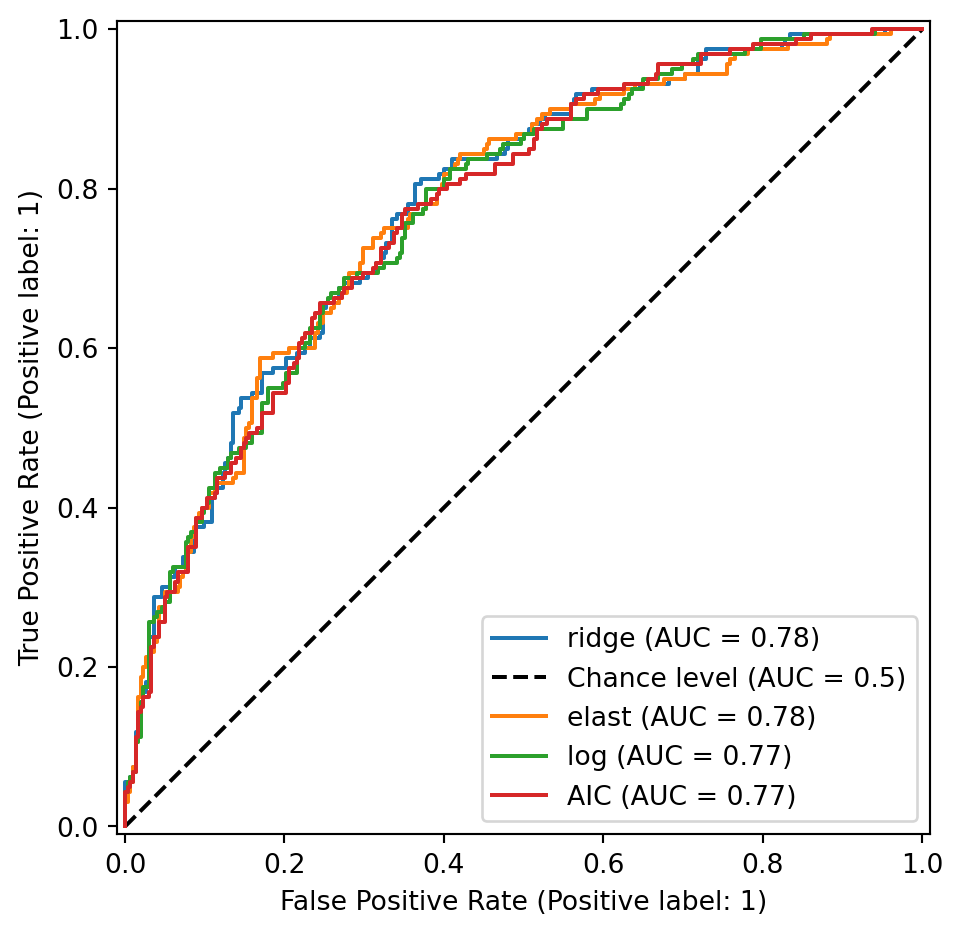

In [16]:
fig, ax = plt.subplots(1,1)
noms = auc.sort_values(ascending=False)
for i, nom in enumerate(noms.index):
    if i<4:
        roc = sklm.RocCurveDisplay.from_predictions(PROB.Y, \
            PROB.loc[:,nom], ax=ax, name=nom, plot_chance_level=(i==0))
fig.tight_layout()

In [17]:
noms = PROB.columns[1:]
matsB = pd.DataFrame({"seuil": pd.Series(0.0, index=noms)})
s = .5
for nom in noms:
    matsB.loc[nom,"seuil"] = s
    confmat = sklm.confusion_matrix(PROB.Y, PROB.loc[:,nom]>=s)
    matsB.loc[nom, "tn"] = confmat[0,0]
    matsB.loc[nom, "tp"] = confmat[1,1]
    matsB.loc[nom, "fn"] = confmat[1,0]
    matsB.loc[nom, "fp"] = confmat[0,1]
    matsB.loc[nom,"sensitivity"] = confmat[1,1]/(confmat[1,1]+confmat[1,0])
    matsB.loc[nom,"specificity"] = confmat[0,0]/(confmat[0,0]+confmat[0,1])
    matsB.loc[nom,"accuracy"] = sklm.accuracy_score(PROB.Y, PROB.loc[:,nom]>=s)
print(matsB.round(3))

        seuil     tn    tp     fn    fp  sensitivity  specificity  accuracy
log       0.5  250.0  82.0   78.0  52.0        0.512        0.828     0.719
BIC       0.5  250.0  82.0   78.0  52.0        0.512        0.828     0.719
AIC       0.5  250.0  83.0   77.0  52.0        0.519        0.828     0.721
ridge     0.5  262.0  77.0   83.0  40.0        0.481        0.868     0.734
lasso     0.5  269.0  64.0   96.0  33.0        0.400        0.891     0.721
elast     0.5  268.0  69.0   91.0  34.0        0.431        0.887     0.729
LassoL    0.5  256.0  77.0   83.0  46.0        0.481        0.848     0.721
RidgeL    0.5  257.0  77.0   83.0  45.0        0.481        0.851     0.723
EnetL     0.5  260.0  76.0   84.0  42.0        0.475        0.861     0.727
LassoA    0.5  265.0  73.0   87.0  37.0        0.456        0.877     0.732
RidgeA    0.5  271.0  60.0  100.0  31.0        0.375        0.897     0.716
EnetA     0.5  269.0  68.0   92.0  33.0        0.425        0.891     0.729


In [18]:
matsN = pd.DataFrame({"seuil": pd.Series(0.0, index=noms)})
nbr0 = don.Y.value_counts()[0]
for nom in noms:
    tmp = PROB.loc[:,nom].sort_values(ascending=True)
    s = (tmp.iloc[nbr0-1]+tmp.iloc[nbr0])/2
    confmat = sklm.confusion_matrix(PROB.Y, PROB.loc[:,nom]>=s)
    matsN.loc[nom,"seuil"] = s
    matsN.loc[nom, "tn"] = confmat[0,0]
    matsN.loc[nom, "tp"] = confmat[1,1]
    matsN.loc[nom, "fn"] = confmat[1,0]
    matsN.loc[nom, "fp"] = confmat[0,1]
    matsN.loc[nom,"sensitivity"] = confmat[1,1]/(confmat[1,1]+confmat[1,0])
    matsN.loc[nom,"specificity"] = confmat[0,0]/(confmat[0,0]+confmat[0,1])
    matsN.loc[nom,"accuracy"] = sklm.accuracy_score(PROB.Y, PROB.loc[:,nom]>=s)
print(matsN.round(3))

        seuil     tn    tp    fn    fp  sensitivity  specificity  accuracy
log     0.431  236.0  94.0  66.0  66.0        0.588        0.781     0.714
BIC     0.444  235.0  93.0  67.0  67.0        0.581        0.778     0.710
AIC     0.441  236.0  94.0  66.0  66.0        0.588        0.781     0.714
ridge   0.418  237.0  95.0  65.0  65.0        0.594        0.785     0.719
lasso   0.428  236.0  94.0  66.0  66.0        0.588        0.781     0.714
elast   0.425  238.0  96.0  64.0  64.0        0.600        0.788     0.723
LassoL  0.442  235.0  93.0  67.0  67.0        0.581        0.778     0.710
RidgeL  0.432  235.0  93.0  67.0  67.0        0.581        0.778     0.710
EnetL   0.436  235.0  93.0  67.0  67.0        0.581        0.778     0.710
LassoA  0.431  236.0  94.0  66.0  66.0        0.588        0.781     0.714
RidgeA  0.418  236.0  94.0  66.0  66.0        0.588        0.781     0.714
EnetA   0.425  233.0  91.0  69.0  69.0        0.569        0.772     0.701


In [19]:
matsY = pd.DataFrame({"seuil": pd.Series(0.0, index=noms)})
for nom in noms:
    fpr, tpr, thr  = sklm.roc_curve(PROB.Y, PROB.loc[:,nom])
    ii = (tpr-fpr).argmax()
    s = thr[ii]
    matsY.loc[nom,"seuil"] = s
    confmat = sklm.confusion_matrix(PROB.Y, PROB.loc[:,nom]>=s)
    matsY.loc[nom, "tn"] = confmat[0,0]
    matsY.loc[nom, "tp"] = confmat[1,1]
    matsY.loc[nom, "fn"] = confmat[1,0]
    matsY.loc[nom, "fp"] = confmat[0,1]
    matsY.loc[nom,"sensitivity"] = tpr[ii]
    matsY.loc[nom,"sensitivity"] = 1-fpr[ii]
    matsY.loc[nom,"accuracy"] = sklm.accuracy_score(PROB.Y, PROB.loc[:,nom]>=s)
print(matsY.round(3))

        seuil     tn     tp    fn     fp  sensitivity  accuracy
log     0.292  188.0  128.0  32.0  114.0        0.623     0.684
BIC     0.280  182.0  129.0  31.0  120.0        0.603     0.673
AIC     0.300  196.0  124.0  36.0  106.0        0.649     0.693
ridge   0.311  192.0  129.0  31.0  110.0        0.636     0.695
lasso   0.360  210.0  118.0  42.0   92.0        0.695     0.710
elast   0.362  212.0  116.0  44.0   90.0        0.702     0.710
LassoL  0.348  202.0  118.0  42.0  100.0        0.669     0.693
RidgeL  0.330  197.0  121.0  39.0  105.0        0.652     0.688
EnetL   0.278  173.0  133.0  27.0  129.0        0.573     0.662
LassoA  0.367  209.0  113.0  47.0   93.0        0.692     0.697
RidgeA  0.346  197.0  121.0  39.0  105.0        0.652     0.688
EnetA   0.364  205.0  115.0  45.0   97.0        0.679     0.693


In [20]:
formuleI = "1 + (" + "+".join(nomsvar) + ")**2"
PROB = pd.DataFrame({"Y":Y,"log":0.0,"BIC":0.0,"AIC":0.0,
                    "ridge":0.0,"lasso":0.0,"elast":0.0})


Xinter = dmatrix(formuleI, don, return_type="dataframe").iloc[:,1:].to_numpy()
Xinter.shape

(462, 45)

In [21]:
cr = StandardScaler()
lassocv =  LogisticRegressionCV(cv=10, penalty="l1", n_jobs=10, Cs=Cs_lasso,  solver="saga", max_iter=2000)
enetcv = LogisticRegressionCV(cv=10, penalty="elasticnet", l1_ratios = [0.5], n_jobs=10,  Cs=Cs_enet, solver="saga", max_iter=2000)
ridgecv = LogisticRegressionCV(cv=10, penalty="l2", n_jobs=10, Cs=Cs_ridge,  max_iter=1000)
pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
pipe_enetcv = Pipeline(steps=[("cr", cr), ("enetcv", enetcv)])
pipe_ridgecv = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecv)])

nb=10
skf = StratifiedKFold(n_splits=nb, shuffle=True, random_state=1234)

In [22]:
for app_index, val_index in skf.split(X,Y):
    Xapp = Xinter[app_index,:]
    Xtest = Xinter[val_index,:]
    Yapp = Y[app_index]
    ### log
    log = LogisticRegression(penalty=None,solver="newton-cholesky").fit(Xapp,Yapp)
    PROB.loc[val_index,"log"] = log.predict_proba(Xtest)[:,1]
    ### bic
    choixbic = lss.LogisticRegressionSelectionFeatureIC(start=[], \
        direction="forward",crit="bic").fit(Xapp,Yapp)
    PROB.loc[val_index, "BIC"] = choixbic.predict_proba(Xtest)[:,1]
    ### aic
    choixaic = lss.LogisticRegressionSelectionFeatureIC(start=[], \
        direction="forward",crit="aic").fit(Xapp,Yapp)
    PROB.loc[val_index, "AIC"] = choixaic.predict_proba(Xtest)[:,1]
    ### lasso
    cr = StandardScaler()
    Cs_lasso = grille(Xapp,Yapp, "lasso")
    lassocv =  LogisticRegressionCV(cv=10, penalty="l1", n_jobs=10,\
                 Cs=Cs_lasso,  solver="saga", max_iter=2000)
    pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
    pipe_lassocv.fit(Xapp,Yapp)
    PROB.loc[val_index,"lasso"] = pipe_lassocv.predict_proba(Xtest)[:,1]
    ### elastic net
    cr = StandardScaler()
    Cs_enet = grille(Xapp,Yapp,"enet")
    enetcv=LogisticRegressionCV(cv=10,penalty="elasticnet",n_jobs=10,\
          l1_ratios=[0.5],Cs=Cs_enet,solver="saga",max_iter=2000)
    pipe_enetcv = Pipeline(steps=[("cr", cr), ("enetcv", enetcv)])
    pipe_enetcv.fit(Xapp,Yapp)
    PROB.loc[val_index,"elast"] = pipe_enetcv.predict_proba(Xtest)[:,1] 
    ### ridge
    cr = StandardScaler()
    Cs_ridge = grille(Xapp,Yapp,"ridge")
    ridgecv = LogisticRegressionCV(cv=10, penalty="l2", \
            Cs=Cs_ridge,  max_iter=1000)
    pipe_ridgecv = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecv)])
    pipe_ridgecv.fit(Xapp,Yapp)
    PROB.loc[val_index,"ridge"] = pipe_ridgecv.predict_proba(Xtest)[:,1]

In [23]:
mc = pd.Series(0.0, index=PROB.columns[1:])
s = 0.5
for i in range(mc.shape[0]):
    mc.iloc[i] = sklm.zero_one_loss(PROB.Y, PROB.iloc[:,i+1]>s)

round(mc.sort_values(ascending=True),3)

AIC      0.245
BIC      0.251
ridge    0.260
elast    0.264
lasso    0.268
log      0.288
dtype: float64

In [24]:
Xquanti = don.drop(columns="Y").\
                    select_dtypes(include=[np.number]).to_numpy()
Xcar = Xquanti**2
Xcub = Xquanti**3
formule = "~" + "+".join(nomsvar)
X = dmatrix(formule, don, return_type="dataframe").\
                                            iloc[:,1:].to_numpy()
Xpol = np.concatenate((X, Xcar, Xcub), axis=1)
Xpol.shape

(462, 25)

In [25]:
cr = StandardScaler()
lassocv =  LogisticRegressionCV(cv=10, penalty="l1", n_jobs=10, Cs=Cs_lasso,  solver="saga", max_iter=2000)
enetcv = LogisticRegressionCV(cv=10, penalty="elasticnet", l1_ratios = [0.5], n_jobs=10,  Cs=Cs_enet, solver="saga", max_iter=2000)
ridgecv = LogisticRegressionCV(cv=10, penalty="l2", n_jobs=10, Cs=Cs_ridge,  max_iter=1000)
pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
pipe_enetcv = Pipeline(steps=[("cr", cr), ("enetcv", enetcv)])
pipe_ridgecv = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecv)])

nb=10
skf = StratifiedKFold(n_splits=nb, shuffle=True, random_state=1234)

In [26]:
for app_index, val_index in skf.split(X,Y):
    Xapp = Xpol[app_index,:]
    Xtest = Xpol[val_index,:]
    Yapp = Y[app_index]
    ### log
    log = LogisticRegression(penalty=None,solver="newton-cholesky").fit(Xapp,Yapp)
    PROB.loc[val_index,"log"] = log.predict_proba(Xtest)[:,1]
    ### bic
    choixbic = lss.LogisticRegressionSelectionFeatureIC(start=[], \
        direction="forward",crit="bic").fit(Xapp,Yapp)
    PROB.loc[val_index, "BIC"] = choixbic.predict_proba(Xtest)[:,1]
    ### aic
    choixaic = lss.LogisticRegressionSelectionFeatureIC(start=[], \
        direction="forward",crit="aic").fit(Xapp,Yapp)
    PROB.loc[val_index, "AIC"] = choixaic.predict_proba(Xtest)[:,1]
    ### lasso
    cr = StandardScaler()
    Cs_lasso = grille(Xapp,Yapp, "lasso")
    lassocv =  LogisticRegressionCV(cv=10, penalty="l1", n_jobs=10,\
                 Cs=Cs_lasso,  solver="saga", max_iter=2000)
    pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
    pipe_lassocv.fit(Xapp,Yapp)
    PROB.loc[val_index,"lasso"] = pipe_lassocv.predict_proba(Xtest)[:,1]
    ### elastic net
    cr = StandardScaler()
    Cs_enet = grille(Xapp,Yapp,"enet")
    enetcv=LogisticRegressionCV(cv=10,penalty="elasticnet",n_jobs=10,\
          l1_ratios=[0.5],Cs=Cs_enet,solver="saga",max_iter=2000)
    pipe_enetcv = Pipeline(steps=[("cr", cr), ("enetcv", enetcv)])
    pipe_enetcv.fit(Xapp,Yapp)
    PROB.loc[val_index,"elast"] = pipe_enetcv.predict_proba(Xtest)[:,1] 
    ### ridge
    cr = StandardScaler()
    Cs_ridge = grille(Xapp,Yapp,"ridge")
    ridgecv = LogisticRegressionCV(cv=10, penalty="l2", \
            Cs=Cs_ridge,  max_iter=1000)
    pipe_ridgecv = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecv)])
    pipe_ridgecv.fit(Xapp,Yapp)
    PROB.loc[val_index,"ridge"] = pipe_ridgecv.predict_proba(Xtest)[:,1]

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.87382e-18): result may not be accurate.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.iteration += _check_optimize_result("lbfgs", opt_res)


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=4.66426e-17): result may not be accurate.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.iteration += _check_optimize_result("lbfgs", opt_res)


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.88187e-18): result may not be accurate.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.iteration += _check_optimize_result("lbfgs", opt_res)


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 3. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.06509e-16): result may not be accurate.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or inc

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.iteration += _check_optimize_result("lbfgs", opt_res)
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 2. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.0961e-16): result may not be accurate.
  warnings.warn(
/opt/miniconda3/lib/p

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.69301e-18): result may not be accurate.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.iteration += _check_optimize_result("lbfgs", opt_res)


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.88851e-18): result may not be accurate.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.iteration += _check_optimize_result("lbfgs", opt_res)


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.77367e-18): result may not be accurate.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.iteration += _check_optimize_result("lbfgs", opt_res)


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.75093e-18): result may not be accurate.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.iteration += _check_optimize_result("lbfgs", opt_res)


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.87373e-18): result may not be accurate.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.iteration += _check_optimize_result("lbfgs", opt_res)


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.78346e-18): result may not be accurate.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.iteration += _check_optimize_result("lbfgs", opt_res)


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.87213e-18): result may not be accurate.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.iteration += _check_optimize_result("lbfgs", opt_res)


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.83617e-18): result may not be accurate.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.iteration += _check_optimize_result("lbfgs", opt_res)


/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 3. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=1.05933e-16): result may not be accurate.
  warnings.warn(
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_glm/_newton_solver.py:576: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration 1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or inc

In [27]:
mc = pd.Series(0.0, index=PROB.columns[1:])
s = 0.5
for i in range(mc.shape[0]):
    mc.iloc[i] = sklm.zero_one_loss(PROB.Y, PROB.iloc[:,i+1]>s)

round(mc.sort_values(ascending=True),3)

BIC      0.266
lasso    0.266
ridge    0.271
elast    0.277
AIC      0.279
log      0.286
dtype: float64

In [28]:
nomsquanti = don.columns[np.isin(don.dtypes, ["float64", \
                          "int64"])].difference(["Y"])
nomsquali = don.columns[np.isin(don.dtypes, ["object", \
                          "category"])].difference(["Y"])
formule = "~" + "+".join(nomsquali)
Xspline = dmatrix(formule, don, return_type="dataframe").\
                                           iloc[:,1:].to_numpy()
for i in nomsquanti:
    xi = don.loc[:,i].quantile([0.25, 0.5, 0.75])
    formule = "-1 + bs(" + i + ",knots=xi, degree=3)"
    BX = dmatrix(formule, don, return_type="dataframe").to_numpy()
    Xspline = np.concatenate((Xspline, BX), axis=1)

Xspline.shape

(462, 49)

In [29]:
cr = StandardScaler()
lassocv =  LogisticRegressionCV(cv=10, penalty="l1", n_jobs=10, Cs=Cs_lasso,  solver="saga", max_iter=2000)
enetcv = LogisticRegressionCV(cv=10, penalty="elasticnet", l1_ratios = [0.5], n_jobs=10,  Cs=Cs_enet, solver="saga", max_iter=2000)
ridgecv = LogisticRegressionCV(cv=10, penalty="l2", n_jobs=10, Cs=Cs_ridge,  max_iter=1000)
pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
pipe_enetcv = Pipeline(steps=[("cr", cr), ("enetcv", enetcv)])
pipe_ridgecv = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecv)])

nb=10
skf = StratifiedKFold(n_splits=nb, shuffle=True, random_state=1234)

In [30]:
for app_index, val_index in skf.split(X,Y):
    Xapp = Xspline[app_index,:]
    Xtest = Xspline[val_index,:]
    Yapp = Y[app_index]
    ### log
    log = LogisticRegression(penalty=None,solver="newton-cholesky").fit(Xapp,Yapp)
    PROB.loc[val_index,"log"] = log.predict_proba(Xtest)[:,1]
    ### bic
    choixbic = lss.LogisticRegressionSelectionFeatureIC(start=[], \
        direction="forward",crit="bic").fit(Xapp,Yapp)
    PROB.loc[val_index, "BIC"] = choixbic.predict_proba(Xtest)[:,1]
    ### aic
    choixaic = lss.LogisticRegressionSelectionFeatureIC(start=[], \
        direction="forward",crit="aic").fit(Xapp,Yapp)
    PROB.loc[val_index, "AIC"] = choixaic.predict_proba(Xtest)[:,1]
    ### lasso
    cr = StandardScaler()
    Cs_lasso = grille(Xapp,Yapp, "lasso")
    lassocv =  LogisticRegressionCV(cv=10, penalty="l1", n_jobs=10,\
                 Cs=Cs_lasso,  solver="saga", max_iter=2000)
    pipe_lassocv = Pipeline(steps=[("cr", cr), ("lassocv", lassocv)])
    pipe_lassocv.fit(Xapp,Yapp)
    PROB.loc[val_index,"lasso"] = pipe_lassocv.predict_proba(Xtest)[:,1]
    ### elastic net
    cr = StandardScaler()
    Cs_enet = grille(Xapp,Yapp,"enet")
    enetcv=LogisticRegressionCV(cv=10,penalty="elasticnet",n_jobs=10,\
          l1_ratios=[0.5],Cs=Cs_enet,solver="saga",max_iter=2000)
    pipe_enetcv = Pipeline(steps=[("cr", cr), ("enetcv", enetcv)])
    pipe_enetcv.fit(Xapp,Yapp)
    PROB.loc[val_index,"elast"] = pipe_enetcv.predict_proba(Xtest)[:,1] 
    ### ridge
    cr = StandardScaler()
    Cs_ridge = grille(Xapp,Yapp,"ridge")
    ridgecv = LogisticRegressionCV(cv=10, penalty="l2", \
            Cs=Cs_ridge,  max_iter=1000)
    pipe_ridgecv = Pipeline(steps=[("cr", cr), ("ridgecv", ridgecv)])
    pipe_ridgecv.fit(Xapp,Yapp)
    PROB.loc[val_index,"ridge"] = pipe_ridgecv.predict_proba(Xtest)[:,1]

/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [31]:
mc = pd.Series(0.0, index=PROB.columns[1:])
s = 0.5
for i in range(mc.shape[0]):
    mc.iloc[i] = sklm.zero_one_loss(PROB.Y, PROB.iloc[:,i+1]>s)

round(mc.sort_values(ascending=True),3)

ridge    0.279
AIC      0.286
elast    0.290
log      0.292
lasso    0.297
BIC      0.305
dtype: float64